# Homework 1: Coding Part (Mridul Bhattarai)
Due: Feb 15, 2021 at 11:59 pm

Submit through Sakai

# Classification of MNIST

MNIST is a dataset of images, consisting of handwritten numbers 0-9 widely used as a benchmark in machine learning. While the dataset is very simple, it is still in seminal papers to demonstrate proof of concept (i.e. [Dynamic Routing](https://arxiv.org/pdf/1710.09829.pdf)). Below we load some sample images of handwritten digits for you.

Benchmark datasets are very useful, to note a couple other widely used benchmarks: [SVHN](http://ufldl.stanford.edu/housenumbers/) (Street View House Numbers), [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) (Like MNIST, but more fashion), [CIFAR](https://www.cs.toronto.edu/~kriz/cifar.html) (10 and 100 different objects), and [ImageNet](http://www.image-net.org/) (very large real world image dataset).

We load up the MNIST dataset below. Eeach image in the MNIST set is 28x28 pixels and is frequently "vectorized" into a vector that contains 784 entries.

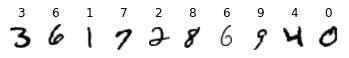

In [1]:
# Import datasets (just run this block)
%matplotlib inline

from sklearn import datasets
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

# might take a few minutes
digit, target = fetch_openml(
    "mnist_784", return_X_y=True, as_frame=False)
digit = (digit/255.0).reshape(-1,28,28)
target = target.astype(int)
for index, (image, label) in enumerate(list(zip(digit, target))[12:22]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('%i' % label)
plt.show()

# Part I

In this homework, you will develop software to classify images of two unique hand-written digits of your choice. That is, you will set aside 300 examples of one hand-written digit, and 300 examples of another hand-written digit, and will develop a computational process to automatically categorize each digit type (i.e., for future example hand-written digits that you may encounter).

We start by choosing the digits and selecting 300 samples for each of them. We will then create our training and testing datasets by splitting these sample groups, using `sklearn.model_selection.train_test_split`, a convenient function. We want to save 10% of the data for testing our developed algorithm. Remember that we want to save our test sets separately, so we can fairly evaluate how well our new algorithms classify on new, *unseen* image data.

`X_test` and `y_test` should be used to evaluate the performance of the classifier you build at the end, where the former is the image dataset itself, while the latter are the associated labels for each image. Moving forward here, please just work with `X_train` and `y_train`, which are the associated dataset and labels that you can use for algorithm development.

So for this block:
a. `digit` array holds all the images. 
b. `targets` array holds the correspnding labels.

Your task is to:
1. Choose the numbers you wish to classify.
2. Using a condition on the `target` array, find which indices hold the digits of your choice. Take the top 300 indices from this selection for both digits.
3. Create the new dataset by concatenating image arrays both digits and label arrays for both digits.

In [2]:
#@title Hints
# 1. `np.where` might help you
# 2. you can use indexing after np.where like: x = np.where(condition)[0][start:end]
# 3. Fancy indexing allows you to use something like x in above example to select elements from arrays

600
600


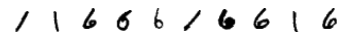

[1 1 6 6 6 1 6 6 1 6]


In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

number_a = 1 # TODO choose your digit
number_b = 6 # TODO choose your digit

digit_a_indexes = np.where(target == number_a)[0][0:300] # select 300 indices for number a
digit_b_indexes = np.where(target == number_b)[0][0:300] # select 300 indices for number b

tar_a = [target[i] for i in digit_a_indexes] 
tar_b = [target[i] for i in digit_b_indexes]

img_a = [digit[i] for i in digit_a_indexes]
img_b = [digit[i] for i in digit_b_indexes]

# replace <> with correct arrays
targets = np.concatenate([tar_a,tar_b]) # target is an array consisting of number_a and number_b
print(targets.shape[0]) # must be 600
images = np.concatenate([img_a,img_b]) #images = images of number_a and number_b
print(images.shape[0]) # must be 600

X_train, X_test, y_train, y_test = train_test_split(images, targets, test_size=0.1, random_state=42)

for index, image in enumerate(X_train[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()
print(y_train[:10]) # should match the plotted digits

# 1. Feature Extraction

You will create 2 feature extractors based on the numbers you choose. Feature extractors are mathematical operations that map an image (represented either as a 2D array or a 1D vector) into an alternative mathematical representation, such as a single scalar.  In this assignment, our feature extractors will be two functions which take in an image and output a single float. Please use mean or total intensity and one feature extractor metric, and then please create a second feature extractor metric that quantifies image symmetry. You may change the digits you wish to classify to make this classification problem easier.

In [4]:
#@title Hints

# 1. For symmetry take the difference between two halves of the image and take a mean of that.
# 2. You can have symmetry about vertical or horizontal axes

In [5]:
# please complete this function:
def compute_features(vector):
    image = vector.reshape(28, 28) # get back original image shape
    def compute_feature_a(image):
      '''compute_feature_a will compute mean intensity'''
      meanIntensity = np.average(image)
      
      return meanIntensity

    def compute_feature_b(image):
      '''compute_feature_b will compute the symmetry'''
      ratioIntensity = np.sum(image[:14,:])/np.sum(image[14:,:])

      return ratioIntensity
    
    return compute_feature_a(image), compute_feature_b(image)

Once you compute these two features, you can apply them to your images. Don't worry about the details of the first function below, all it does is map the `compute_features` function you wrote to each image in your `X_train` variable.

Afterwards let us plot the features you've crafted to see if they can separate into two classes.

(0.4193198676252425, 1.2764370337867483)

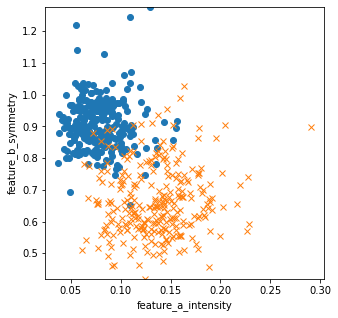

In [6]:
# Apply and plot your features (you can just run this block and inspect the output)
X_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_features_a = X_features[np.where(y_train==number_a)] # intensity
X_features_b = X_features[np.where(y_train==number_b)] # symmetry 

plt.figure(figsize=(5,5))
plt.plot(X_features_a[:, 0], X_features_a[:, 1], 'o')
plt.plot(X_features_b[:, 0], X_features_b[:, 1], 'x')
plt.xlabel('feature_a_intensity')

plt.ylabel('feature_b_symmetry')
plt.ylim(X_features[:, 1].min(), X_features[:, 1].max()) 

# 2. Linear Classification with Pseudo Inverse

`X_features` is a 2 dimensional array of features and `y_train` is our ground truth label. Find the best plane that separates these two classes using the pseudo inverse and plot it. For this problem, as discussed in class, we set the labels as `y=-1` for `number_a` and `y=1` for `number_b`.

The loss $L$ we would like to minimize for each $i$ row in our matrix is.

$$L  = \frac{1}{2}\Sigma (y^{(i)} - W^{T}x^{(i)})^{2}$$

where

$$x^{(i)} = 
\begin{bmatrix}
    feature_a \\
    feature_b \\
\end{bmatrix}$$

$$W = 
\begin{bmatrix}
    w_1 \\
    w_2 \\
\end{bmatrix}$$


In matrix form we convert $x^{(i)}$ into $X$ which is the number of examples we have, in our case is MNIST digit features extracted.

$$X = 
\begin{bmatrix}
    feature_{a1} & feature_{b1} \\
    feature_{a2} & feature_{b2} \\
    ... & ... \\
    feature_{ai} & feature_{bi} \\
\end{bmatrix}$$


$$L  = \frac{1}{2}( Y-XW )^{T} (Y-XW)$$


### Explain

Let's solve L analytically, by setting $\frac{d}{dW}L = 0$ and solving for $W$, showing your steps along the way. 

Step 1: $$L  = \frac{1}{2}( Y-XW )^{T} (Y-XW)$$

Step 2: $$ \frac{d}{dW}L  = \frac{d}{dW} \frac{1}{2}( Y-XW )^{T} (Y-XW)$$

Step 3: $$ \frac{d}{dW}L  = \frac{1}{2}\times 2 \times ( Y-XW )^{T} (-X) $$

Step 4: $$ 0  = - ( Y-XW )^{T} X $$

Step 5: $$ XY  = (X^{T}X)W $$

Step 6: $$ W = (X^{T}X)^{-1}X^{T}Y $$

(complete the remaining steps in markdown)

In [7]:
# TODO
# Please do not forget to complete the above

### Compute
Going back to linear algebra, we can re-write the classification problem as $Xw = y^*$, as we did during class. Here, $X$ is our features matrix `X_features` that has the features of each data example along each row, $y^*$ is our `pseudo_y` vector, and $w$ is the unknown weights vector that we'd like to figure out.

The pseudo inverse is $$(X^{T}X)^{-1}X^{T} = X^{+}$$

Solving for $w$, $$w = X^{+}y^*$$

To perform this computation: 

#### (a) create a features vector $X$ and compute its pseudo inverse. (This is the var `X_features`)

#### (b) create a vector like $y^*$ to hold the labels. (Done below for you as `pseudo_y`)

#### (c) find $w$

In [8]:
# replace labels with +1 and -1
from numpy.linalg import inv

pseudo_y = np.copy(y_train)
pseudo_y[y_train == number_a] = -1
pseudo_y[y_train == number_b] = 1

features_x = np.copy(X_features) # copy X_features

# calculating pseudo inverse X: step-by-step
"""
pseudo_inv_x = np.transpose(features_x)
pseudo_inv_x = np.dot(pseudo_inv_x,features_x)
pseudo_inv_x = inv(pseudo_inv_x)
pseudo_inv_x = np.dot(pseudo_inv_x,np.transpose(features_x))
"""

# numpy function to calculate pseudo inverse (difference between two techniques was 6.465046732554228e-15)
pseudo_inv_x = np.linalg.pinv(features_x)

w = np.dot(pseudo_inv_x,pseudo_y)
print(w)

[14.94898058 -2.06432395]


In [9]:
#check (not for grading purpose)
'''
y = np.dot(w,np.transpose(X_features))

for index, image in enumerate(X_train[11:20]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()
print(y[11:20])

y[y <= 0] = 1
print(y[11:20])
'''

"\ny = np.dot(w,np.transpose(X_features))\n\nfor index, image in enumerate(X_train[11:20]):\n    plt.subplot(1, 10, index + 1)\n    plt.axis('off')\n    plt.imshow(image, cmap=plt.cm.gray_r)\nplt.show()\nprint(y[11:20])\n\ny[y <= 0] = 1\nprint(y[11:20])\n"

### (d) To examine the result of the least squares solution under this formulation, compute the train and test error using an appropriate threshold (i.e., 0). Does your trained model generalize well to the test data? 

Create a function called `accuracy_metrics` which does this. Remember that you might need to apply the feature extraction to your test data and create pseudo labels for it before you calculate test accuracy.

In [10]:
#@title Hints
# Inside the accuracy metrics function, calculate the predicted values using features and weights
# Set a label threshold, i.e. assign class 1 if the value is greater than some number and -1 otherwise
# compare the predicted labels to true labels and find the PERCENTAGE of correct predictions
# use the function for training data and testing data with correct arguments

In [11]:
def accuracy_metrics(features, weights, label):
  y_predicted = np.dot(weights,np.transpose(features))
  y_predicted[y_predicted < 0]  = -1 # assigning -1 for number_a (1)
  y_predicted[y_predicted >= 0] = 1 # assigning 1 for number_b (6)

  y_label = np.copy(label)
  y_label[y_label == number_a] = -1
  y_label[y_label == number_b] = 1

  total_n = len(label)
  correct_n = (y_predicted == y_label).sum()

  percentAccuracy = (correct_n/total_n) * 100

  return percentAccuracy # Return the % accuracy

# When you use the function,
# features should be your X_features
# label should be the true label

In [12]:
# Determining accuracy for train data
print("Accuracy for trained data without bias: ",accuracy_metrics(X_features,w,y_train))

X_features_test = np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

# print(X_features_test.shape) 

# Determining accuracy for test data
print("Accuracy for test data without bias: ",accuracy_metrics(X_features_test,w,y_test))

Accuracy for trained data without bias:  91.66666666666666
Accuracy for test data without bias:  93.33333333333333


### (e) Visualize the decision boundary corresponding to your chosen threshold using the provided `visualize_model` function.  

The function `visualize_model` takes in features, labels, and your calculated weights and shows a matplotlib figure. If we are using a bias term, this function assumes that the weight vector has format: `[weight0, weight1, bias]`. So bias is appended to the back of the weight vector.

In [13]:
# just run this block
import matplotlib.lines as mlines
def newline(weight):
    # adapted from https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
    if len(weight) == 2:
        p1 = weight[0]
        p2 = weight[1]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = 0
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax)
            ymin = -p1/p2*(xmin)
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
       
    elif len(weight) == 3:
        p1 = weight[0]
        p2 = weight[1]
        b = weight[2]
        ax = plt.gca()
        xmin, xmax = ax.get_xbound()
        if(p2 == 0):
            xmin = xmax = -b/p1
            ymin, ymax = ax.get_ybound()
        else:
            ymax = -p1/p2*(xmax) - b/p2
            ymin = -p1/p2*(xmin) - b/p2
        l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = "g", label = "Decision")
        ax.add_line(l)
       
    return l

def visualize_model(features, labels, weights):
    plt.figure(figsize=(5,5))
    X_features_a = features[np.where(labels==-1)]
    X_features_b = features[np.where(labels==1)]
    plt.plot(X_features_a[:, 0], X_features_a[:, 1], '.', label = "{}".format(number_a))
    plt.plot(X_features_b[:, 0], X_features_b[:, 1], '.', label = "{}".format(number_b))
    plt.xlabel('feature_a')
    plt.ylabel('feature_b')
    plt.ylim(features[:, 1].min(), features[:, 1].max())
    newline(weights)
    plt.gca().legend(loc = 1)
    return None

Plug in your weight variable and run the visualization.

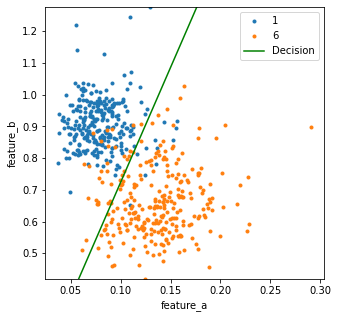

In [14]:
visualize_model(X_features, pseudo_y, w)  # should output the datapoints with the decision boundary

### (f) Repeat the above steps after adding in a bias term, allowing for the classification line to not pass through the origin. You can do this by augmenting the X feature matrix with an additional feature column of ones, and making the unknown weight vector one entry longer -- does performance improve?

If you created your functions correctly, you shouldn't need to change them and you only need to modify `X_features`. Make sure to add this column of ones to the end of the array so that the visualization works properly and that the shape of `X_features` is now (length, 3) instead of (length, 2).

In [15]:
# X_features_bias = np.hstack((np.ones((X_features.shape[0],1)),X_features)) # had to reverse this to see the results
X_features_bias = np.hstack((X_features,np.ones((X_features.shape[0],1))))
print(X_features_bias.shape)

# numpy function to calculate pseudo inverse
pseudo_inv_x_bias = np.linalg.pinv(X_features_bias)

w_bias = np.dot(pseudo_inv_x_bias,pseudo_y)
print(w_bias)

(540, 3)
[ 9.64805134 -3.74389115  1.91835887]


In [29]:
# Determining accuracy for train data after bias
print("Accuracy for trained data with bias: ",accuracy_metrics(X_features_bias,w_bias,y_train))

# X_features_test_bais = np.hstack((np.ones((X_features_test.shape[0],1)),X_features_test))
X_features_test_bais = np.hstack((X_features_test,np.ones((X_features_test.shape[0],1))))

# Determining accuracy for test data
print("Accuracy for test data without bias: ",accuracy_metrics(X_features_test_bais,w_bias,y_test))

Accuracy for trained data with bias:  93.7037037037037
Accuracy for test data without bias:  93.33333333333333


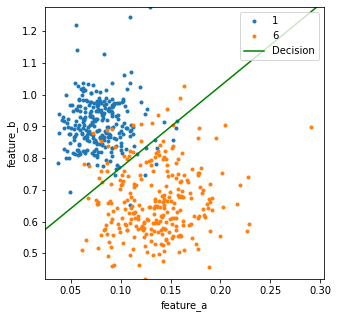

In [17]:
visualize_model(X_features, pseudo_y, w_bias) # Visualizing the decision after adding bias (green line doesn't pass through the origin)

# Part II

Once again, in Part II, we'll add a very small modification to your code in Part II. Here, let’s assume that this camera has a special filter in its lens that blurs the MNIST image in a special way before it is detected. Let’s model this 2D blur as a convolution with the 3x3 filter below.

$$X = 
\begin{bmatrix}
    -1 & 0 & 1 \\
    -1 & 0 & 1 \\
    -1 & 0 & 1 \\
\end{bmatrix}$$

Convolve the set of MNIST images with this kernel before proceeding to compute the two features of interest as in Part I: the total image intensity, and the image symmetry. Repeat the exercise above to obtain a plot of classification performance and an average classification accuracy score. You can use the bias variable from the start for this.

**Note that this classification score (in some sense) reflects what would be possible with a “computational” camera, which has a special aperture shape for enhanced image classification.**

 - Plot Points after feature generation
 - Linear Classification - accuracy and plots

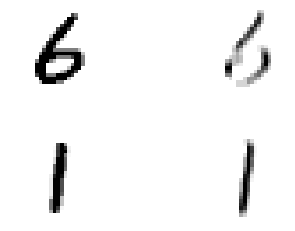

In [18]:
from scipy.ndimage import convolve

kernelX = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])

convImgs = np.zeros(images.shape)
# convImgs.shape

for index, image in enumerate(images):
  convImgs[index::] = convolve(image,kernelX)
convImgs[convImgs < 0]  = 0

plt.subplot(2, 2, 1)
plt.axis('off')
plt.imshow(images[306],cmap=plt.cm.gray_r)

plt.subplot(2, 2, 2)
plt.axis('off')
plt.imshow(convImgs[306],cmap=plt.cm.gray_r)

plt.subplot(2, 2, 3)
plt.axis('off')
plt.imshow(images[6],cmap=plt.cm.gray_r)

plt.subplot(2, 2, 4)
plt.axis('off')
plt.imshow(convImgs[6],cmap=plt.cm.gray_r)

[ 22.32701722 -29.49480263]
Accuracy for trained data (after blurring) without bias:  84.81481481481481
Accuracy for test data (after blurring) without bias:  81.66666666666667


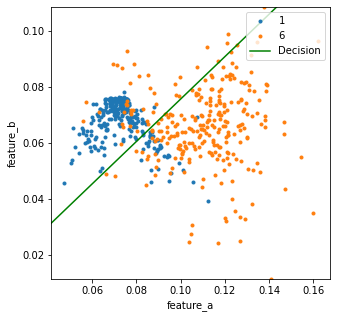

In [30]:
X_train_conv, X_test_conv, y_train_conv, y_test_conv = train_test_split(convImgs, targets, test_size=0.1, random_state=42)

X_features_conv = np.apply_along_axis(compute_features, 1,
                                 X_train_conv.reshape(X_train_conv.shape[0], X_train_conv.shape[1]*X_train_conv.shape[2]))

'''
X_features_conv_a = X_features_conv[np.where(y_train_conv==number_a)]
X_features_conv_b = X_features_conv[np.where(y_train_conv==number_b)]

plt.figure(figsize=(5,5))
plt.plot(X_features_conv_a[:, 0], X_features_conv_a[:, 1], 'o')
plt.plot(X_features_conv_b[:, 0], X_features_conv_b[:, 1], 'x')
plt.xlabel('feature_conv_a')

plt.ylabel('feature_conv_b')
plt.ylim(X_features_conv[:, 1].min(), X_features_conv[:, 1].max()) 

'''

pseudo_y_conv = np.copy(y_train_conv)
pseudo_y_conv[y_train_conv == number_a] = -1
pseudo_y_conv[y_train_conv == number_b] = 1

# numpy function to calculate pseudo inverse
pseudo_inv_x_conv = np.linalg.pinv(X_features_conv)

w_conv = np.dot(pseudo_inv_x_conv,pseudo_y_conv) # weight for the blurred images 
print(w_conv)

# Determining accuracy for train data (after convolution)
print("Accuracy for trained data (after blurring) without bias: ",accuracy_metrics(X_features_conv,w_conv,y_train_conv))

X_features_test_conv = np.apply_along_axis(compute_features, 1,
                                 X_test_conv.reshape(X_test_conv.shape[0], X_test_conv.shape[1]*X_test_conv.shape[2]))

# Determining accuracy for test data (after convolution)
print("Accuracy for test data (after blurring) without bias: ",accuracy_metrics(X_features_test_conv,w_conv,y_test_conv))

visualize_model(X_features_conv, pseudo_y_conv, w_conv)

(540, 3)
[32.62222781  0.43764985 -3.00621694]
Accuracy for trained data (after blurring) with bias:  88.33333333333333
Accuracy for test data (after blurring) with bias:  86.66666666666667


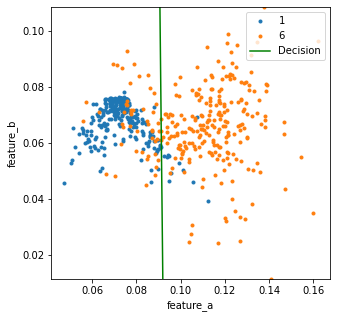

In [31]:
# with bias
X_features_bias_conv = np.hstack((X_features_conv,np.ones((X_features_conv.shape[0],1))))
print(X_features_bias_conv.shape)

# numpy function to calculate pseudo inverse
pseudo_inv_x_bias_conv = np.linalg.pinv(X_features_bias_conv)

w_bias_conv = np.dot(pseudo_inv_x_bias_conv,pseudo_y_conv)
print(w_bias_conv)

# Determining accuracy for train data after bias and convolution
print("Accuracy for trained data (after blurring) with bias: ",accuracy_metrics(X_features_bias_conv,w_bias_conv,y_train_conv))

# Determining accuracy for test data
X_features_test_bais_conv = np.hstack((X_features_test_conv,np.ones((X_features_test_conv.shape[0],1))))

print("Accuracy for test data (after blurring) with bias: ",accuracy_metrics(X_features_test_bais_conv,w_bias_conv,y_test_conv))

visualize_model(X_features_conv, pseudo_y_conv, w_bias_conv)

# Part III

In Part III, we'll examine another way in which a computational imaging system can be built. let us assume that our camera system has filters in the Fourier Plane and we can record the intensity of images after the filtering.

Our feature generation will now change to reflect this imaging system. You will attempt:
 - Plot Points after feature generation
 - Linear Classification - accuracy and plots

First, write a function that generates the 2D Fourier transform of an image and plot the intensity and phase of the Fourier Transform for the input images.

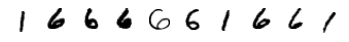

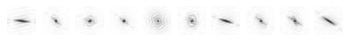

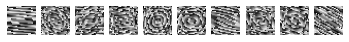

In [21]:
from numpy.fft import fft2, fftshift, ifftshift, ifft2
from skimage.color import rgb2gray

def FourierT(image):
  fftImage = fftshift(fft2(ifftshift(image)))
  return fftImage

for index, image in enumerate(X_train[11:21]):
  plt.subplot(1, 10, index + 1)
  plt.axis('off')
  plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()

for index, image in enumerate(X_train[11:21]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(np.abs(FourierT(image)),cmap=plt.cm.gray_r) # amplitude
plt.show()

for index, image in enumerate(X_train[11:21]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(np.angle(FourierT(image)),cmap=plt.cm.gray_r) # phase
plt.show()

Now, we can think of a hypothetical imaging system that can capture only the high frequency features or only the low frequency features. We can achieve this by applying a high pass filter and a low pass filter to the image. 

Write a function for each of them. The low pass filter should a be square of shape (10,10) and the high pass filter passes everything but this square. Return the filtered Fourier Transform magnitude for both.

In [22]:
#@title Hints
# Filtering is simply taking an elementwise product with a mask in the Fourier domain.
# For low pass filter, you can make a ones matrix of size (10,10) and pad with zeros to get the right shape
# For high pass, do the opposite.

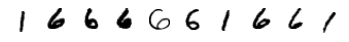

<ipython-input-23-255956747172>:27: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im_fft))


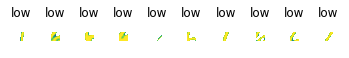

<ipython-input-23-255956747172>:35: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(im_fft))


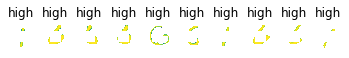

In [23]:
def high_pass(image):
  maskMatrix = np.zeros((10,10))
  maskMatrix = np.pad(maskMatrix, (9, 9), 'constant', constant_values=1)

  filteredImg = np.multiply(maskMatrix,image)
  
  return filteredImg
  
def low_pass(image):
  maskMatrix = np.ones((10,10))
  maskMatrix = np.pad(maskMatrix, (9, 9), 'constant', constant_values=0)

  filteredImg = np.multiply(maskMatrix,image)

  return filteredImg

for index, image in enumerate(X_train[11:21]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r)
plt.show()

for index, image in enumerate(X_train[11:21]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    im_fft = low_pass(image)
    plt.imshow(np.log(im_fft))
    plt.title("low")
plt.show()

for index, image in enumerate(X_train[11:21]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    im_fft = high_pass(image)
    plt.imshow(np.log(im_fft))
    plt.title("high")
plt.show()

Now use the mean value for the high frequency magnitudes and low frequency magnitudes as features and redo the linear classification. You can add the bias variable from the start for this.

In [24]:
def compute_features(vector):
    image = vector.reshape(28, 28) # get back original image shape
    def compute_hf_mean(image):
      '''computes the mean magnitude of high frequency features'''
      highFilteredImg = high_pass(image)
      meanIntensity = np.average(highFilteredImg)
      
      return meanIntensity

    def compute_lf_mean(image):
      '''computes the mean magnitude of low frequency features'''
      lowFilteredImg = low_pass(image)
      meanIntensity = np.average(lowFilteredImg)

      return meanIntensity
    
    return compute_hf_mean(image), compute_lf_mean(image)

(0.014360744297719087, 0.1206732693077231)

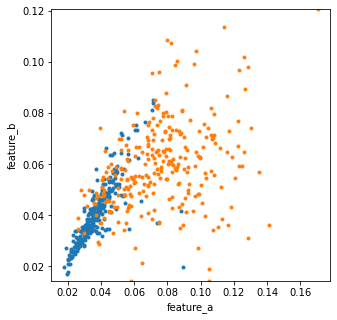

In [25]:
# Apply and plot your features (you can just run this block and inspect the output)

X_f_features = np.apply_along_axis(compute_features, 1,
                                 X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]))

X_f_features_a = X_f_features[np.where(y_train==number_a)]
X_f_features_b = X_f_features[np.where(y_train==number_b)]

plt.figure(figsize=(5,5))
plt.plot(X_f_features_a[:, 0], X_f_features_a[:, 1], '.')
plt.plot(X_f_features_b[:, 0], X_f_features_b[:, 1], '.')
plt.xlabel('feature_a')
plt.ylabel('feature_b')
plt.ylim(X_f_features[:, 1].min(), X_f_features[:, 1].max()) 

In [34]:
# adding bias
X_f_features_bias = np.hstack((X_f_features,np.ones((X_f_features.shape[0],1))))
print(X_f_features_bias.shape)

# numpy function to calculate pseudo inverse
pseudo_inv_x_f_bias = np.linalg.pinv(X_f_features_bias)

w_f_bias = np.dot(pseudo_inv_x_f_bias,pseudo_y) # weight with bias
print(w_f_bias)

(540, 3)
[22.6860655   7.26449519 -1.64471892]


Accuracy for trained data (after filtering) with bias:  84.44444444444444


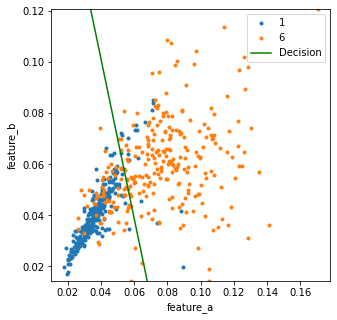

In [33]:
# Determining accuracy for train data after bias (for filtered)
print("Accuracy for trained data (after filtering) with bias: ",accuracy_metrics(X_f_features_bias,w_f_bias,y_train))

visualize_model(X_f_features, pseudo_y, w_f_bias)

In [32]:
X_f_features_test = np.apply_along_axis(compute_features, 1,
                                 X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]))
X_f_features_test_bias = np.hstack((X_f_features_test,np.ones((X_f_features_test.shape[0],1))))

print(X_f_features_test.shape)

# Determining accuracy for test data after bias (for filtered)
print("Accuracy for test data (after filtering) with bias: ",accuracy_metrics(X_f_features_test_bias,w_f_bias,y_test))

(60, 2)
Accuracy for test data (after filtering) with bias:  83.33333333333334
